# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing

house = pd.read_csv('train_house.csv')

house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# drop NaN

house = house.dropna(axis=1)

house

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
# Memisahkan data menjadi numerikal & kategorikal

# Select numerical columns
num_cols = house.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_data = house[num_cols]

# Select categorical columns
cat_cols = house.select_dtypes(include=["object"]).columns.tolist()
cat_data = house[cat_cols]

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

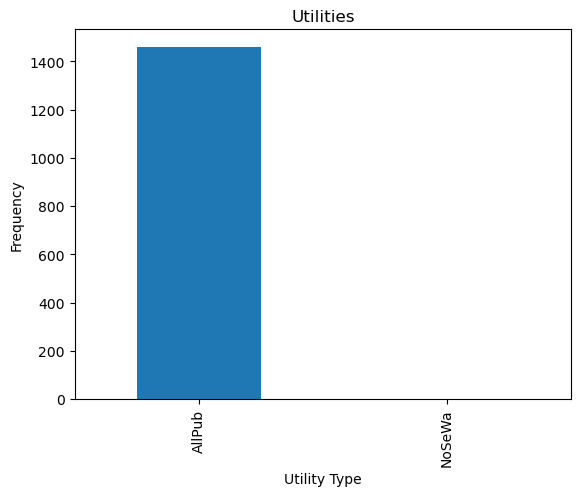

Utilities:
         Count  Percentage
AllPub   1459   99.931507
NoSeWa      1    0.068493


In [4]:
### Barplot Utilities

import matplotlib.pyplot as plt

util_counts = house["Utilities"].value_counts()
util_counts.plot.bar()

plt.title("Utilities")
plt.xlabel("Utility Type")
plt.ylabel("Frequency")
plt.show()

# Count and calculate percentage for Utilities column
util_counts = house["Utilities"].value_counts()
util_percents = util_counts / len(house) * 100
util_table = pd.concat([util_counts, util_percents], axis=1, keys=['Count', 'Percentage'])
print("Utilities:\n", util_table)

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

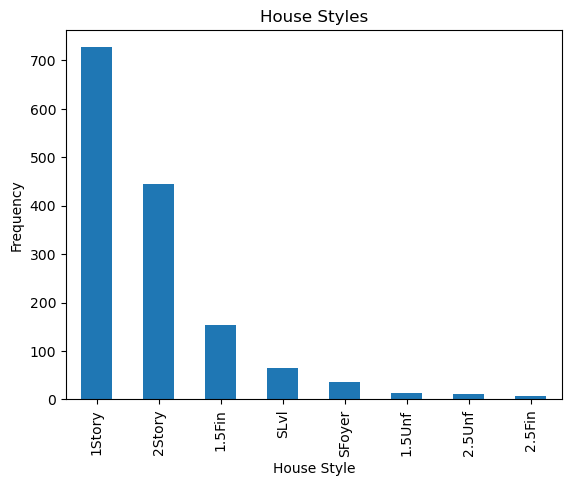


House Styles:
         Count  Percentage
1Story    726   49.726027
2Story    445   30.479452
1.5Fin    154   10.547945
SLvl       65    4.452055
SFoyer     37    2.534247
1.5Unf     14    0.958904
2.5Unf     11    0.753425
2.5Fin      8    0.547945


In [5]:
### Barplot of housetyle

house_style_counts = house["HouseStyle"].value_counts()
house_style_counts.plot.bar()

plt.title("House Styles")
plt.xlabel("House Style")
plt.ylabel("Frequency")
plt.show()

# Count and calculate percentage for HouseStyle column
style_counts = house["HouseStyle"].value_counts()
style_percents = style_counts / len(house) * 100
style_table = pd.concat([style_counts, style_percents], axis=1, keys=['Count', 'Percentage'])
print("\nHouse Styles:\n", style_table)

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

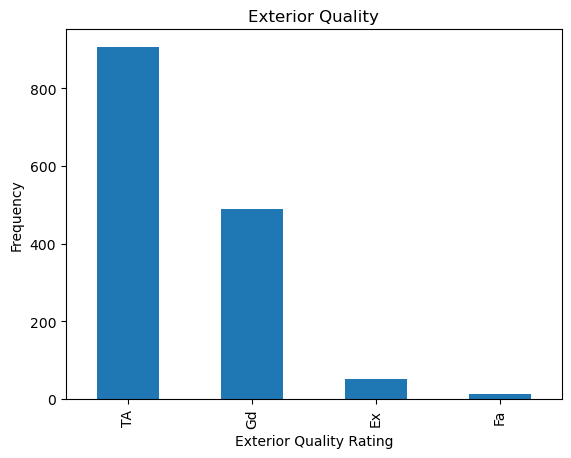


Exterior Quality:
     Count  Percentage
TA    906   62.054795
Gd    488   33.424658
Ex     52    3.561644
Fa     14    0.958904


In [6]:
### Barplot ExterQual

exter_qual_counts = house["ExterQual"].value_counts()
exter_qual_counts.plot.bar()

plt.title("Exterior Quality")
plt.xlabel("Exterior Quality Rating")
plt.ylabel("Frequency")
plt.show()

# Count and calculate percentage for ExterQual column
exter_counts = house["ExterQual"].value_counts()
exter_percents = exter_counts / len(house) * 100
exter_table = pd.concat([exter_counts, exter_percents], axis=1, keys=['Count', 'Percentage'])
print("\nExterior Quality:\n", exter_table)

#### **Analisis tentang variabel kategorikal**

Berdasarkan rangkuman tersebut, terlihat bahwa kolom “Utilities” hampir seluruhnya didominasi oleh kategori “AllPub”, dengan hanya satu observasi pada kategori “NoSeWa”. Kolom "HouseStyle" didominasi oleh kategori "1Story" dan "2Story", dengan kategori "1.5Fin", "SLvl", "SFoyer", "2.5Unf", dan "1.5Unf" masing-masing kurang dari 11% dari total data. Terakhir, kolom "ExterQual" didominasi oleh kategori "TA" dan "Gd", dengan kategori "Ex" dan "Fa" masing-masing berisi kurang dari 4% data.

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

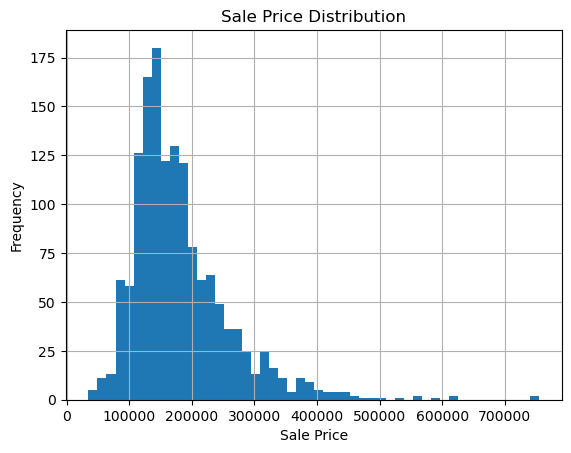


SalePrice Statistics:
 mean    180921.195890
std      79442.502883
min      34900.000000
25%     129975.000000
50%     163000.000000
75%     214000.000000
max     755000.000000
Name: SalePrice, dtype: float64


In [7]:
# Create a histogram of the SalePrice column
house["SalePrice"].hist(bins=50)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# Analyze mean, median, and standard deviation of the SalePrice column
stats = house["SalePrice"].describe()[1:]
print("\nSalePrice Statistics:\n", stats)

#### **Analisis tentang variabel `SalePrice`**

Berdasarkan output dari kode ini, kita dapat menyimpulkan bahwa:

* Harga jual rata-rata adalah 180.921,20, yang merupakan ukuran tendensi sentral data.
* Harga jual nilai tengah (median) adalah 163.000,00, yang merupakan ukuran lain dari kecenderungan sentral dari data yang kurang sensitif terhadap outlier.
* Deviasi standar harga jual adalah 79.442,50, yang merupakan ukuran penyebaran data di sekitar rata-rata. Standar deviasi yang besar menunjukkan bahwa data tersebar luas, sedangkan standar deviasi yang kecil menunjukkan bahwa data terkelompok dengan rapat di sekitar rata-rata.

Singkatnya, data "SalePrice" agak miring ke kanan (skew to right), dengan rata-rata yang lebih tinggi dari median. Ada juga beberapa outlier dengan harga relatif tinggi yang memengaruhi standar deviasi. Secara keseluruhan, data tampak terdistribusi relatif normal dengan penyebaran nilai sedang di sekitar rata-rata.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

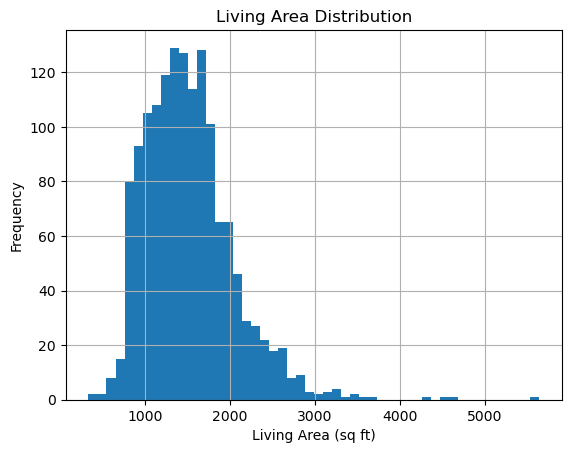


GrLivArea Statistics:
 mean    1515.463699
std      525.480383
min      334.000000
25%     1129.500000
50%     1464.000000
75%     1776.750000
max     5642.000000
Name: GrLivArea, dtype: float64


In [24]:
# Create a histogram of the GrLivArea column
house["GrLivArea"].hist(bins=50)
plt.title("Living Area Distribution")
plt.xlabel("Living Area (sq ft)")
plt.ylabel("Frequency")
plt.show()

# Analyze mean, median, and standard deviation of the GrLivArea column
stats = house["GrLivArea"].describe()[1:]
print("\nGrLivArea Statistics:\n", stats)

#### **Analisis tentang variabel `GrlivArea`**

Berdasarkan output dari kode ini, kita dapat menyimpulkan bahwa:

* GrLivArea rata-rata adalah 1.499,69 kaki persegi, yang merupakan ukuran tendensi sentral data.
* Median GrLivArea adalah 1.456,00 kaki persegi, yang merupakan ukuran lain dari kecenderungan sentral data yang kurang sensitif terhadap outlier.
* Deviasi standar GrLivArea adalah 497,42 kaki persegi, yang merupakan ukuran penyebaran data di sekitar rata-rata. Standar deviasi yang besar menunjukkan bahwa data tersebar luas, sedangkan standar deviasi yang kecil menunjukkan bahwa data terkelompok dengan rapat di sekitar rata-rata.
* Histogram kolom "GrLivArea" menunjukkan bahwa data agak miring ke kanan (skew to right), dengan ekor panjang dengan nilai yang lebih tinggi. Ada juga puncak yang lebih kecil sekitar 2.500 kaki persegi. Secara keseluruhan, data tampak terdistribusi relatif normal dengan penyebaran nilai sedang di sekitar rata-rata.

Singkatnya, data "GrLivArea" agak miring ke kanan, dengan rata-rata lebih tinggi dari median. Ada juga beberapa nilai yang relatif besar yang mempengaruhi standar deviasi. Histogram menunjukkan puncak sekitar 2.500 kaki persegi, yang menunjukkan bahwa ini adalah ukuran yang populer untuk tempat tinggal di kumpulan data.

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

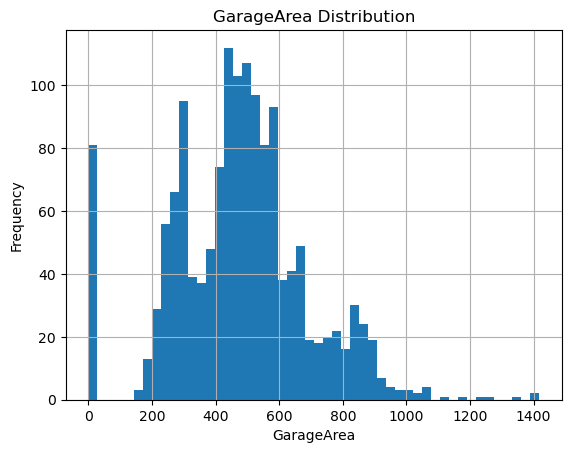


GarageArea Statistics:
 mean     472.980137
std      213.804841
min        0.000000
25%      334.500000
50%      480.000000
75%      576.000000
max     1418.000000
Name: GarageArea, dtype: float64


In [8]:
# Create a histogram of the GarageArea column
house["GarageArea"].hist(bins=50)
plt.title("GarageArea Distribution")
plt.xlabel("GarageArea")
plt.ylabel("Frequency")
plt.show()

# Analyze mean, median, and standard deviation of the GarageArea column
stats = house["GarageArea"].describe()[1:]
print("\nGarageArea Statistics:\n", stats)

#### **Analisis tentang variabel `GarageArea`**

Berdasarkan output dari kode ini, kita dapat menyimpulkan bahwa:

* Rata-rata GarageArea adalah 472,98 kaki persegi, yang merupakan ukuran tendensi sentral data.
* Nilai tengah GarageArea adalah 480,00 kaki persegi, yang merupakan ukuran lain dari kecenderungan sentral data yang kurang sensitif terhadap outlier.
* Deviasi standar GarageArea adalah 213,80 kaki persegi, yang merupakan ukuran penyebaran data di sekitar rata-rata. Standar deviasi yang besar menunjukkan bahwa data tersebar luas, sedangkan standar deviasi yang kecil menunjukkan bahwa data terkelompok dengan rapat di sekitar rata-rata.
* Histogram kolom "GarageArea" menunjukkan bahwa data agak miring ke kanan, dengan ekor panjang dengan nilai yang lebih tinggi. Ada juga puncak sekitar 0 kaki persegi, yang menunjukkan bahwa ada beberapa rumah di dataset yang tidak memiliki garasi. Secara keseluruhan, data tampak terdistribusi relatif normal dengan penyebaran nilai sedang di sekitar rata-rata.

Singkatnya, data "GarageArea" agak miring ke kanan, dengan rata-rata yang lebih rendah dari median. Ada juga beberapa nilai yang relatif kecil sekitar 0 yang mempengaruhi standar deviasi. Histogram menunjukkan puncak sekitar 0 kaki persegi, yang menunjukkan bahwa sebagian besar rumah di kumpulan data tidak memiliki garasi.

## Pemrosesan Data Variabel Numerikal

In [11]:
# Transform SalePrice column using a log-10 transformation
house["SalePrice_Log10"] = np.log10(house["SalePrice"])

# Analyze mean, median, and standard deviation of the transformed SalePrice column
stats = house["SalePrice_Log10"].describe()[1:]
print("\nTransformed SalePrice Statistics:\n", stats)


Transformed SalePrice Statistics:
 mean    5.221979
std     0.173480
min     4.542825
25%     5.113860
50%     5.212188
75%     5.330414
max     5.877947
Name: SalePrice_Log10, dtype: float64


C:\Users\fikri\AppData\Local\Temp\ipykernel_15268\2279150274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house["SalePrice_Log10"] = np.log10(house["SalePrice"])


In [13]:
# Transform GrLivArea column using a log-10 transformation
house["GrLivArea_Log10"] = np.log10(house["GrLivArea"])

# Analyze mean, median, and standard deviation of the transformed GrLivArea column
stats = house["GrLivArea_Log10"].describe()[1:]
print("\nTransformed GrLivArea Statistics:\n", stats)


Transformed GrLivArea Statistics:
 mean    3.156354
std     0.144859
min     2.523746
25%     3.052886
50%     3.165541
75%     3.249626
max     3.751433
Name: GrLivArea_Log10, dtype: float64


C:\Users\fikri\AppData\Local\Temp\ipykernel_15268\1932922796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house["GrLivArea_Log10"] = np.log10(house["GrLivArea"])


In [19]:
# Transform GarageArea column using a log-10 transformation
house["GarageArea_Log10"] = np.log10(house["GarageArea"])


# Drop rows with 0 value in the 'GarageArea' column
house = house[house['GarageArea'] != 0]

# Analyze mean, median, and standard deviation of the transformed GrLivArea column
stats = house["GarageArea_Log10"].describe()[1:]
print("\nTransformed GarageArea Statistics:\n", stats)


Transformed GarageArea Statistics:
 mean    2.669615
std     0.164278
min     2.204120
25%     2.579784
50%     2.684845
75%     2.763425
max     3.151676
Name: GarageArea_Log10, dtype: float64


C:\Users\fikri\AppData\Local\Temp\ipykernel_15268\3419269114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house["GarageArea_Log10"] = np.log10(house["GarageArea"])


#### **Penjelasan dan analisis tentang pemrosesan data**

Semua data yang ditransformasikan menggunakan log10 menghasilkan distribusi yang normal, sebagaimana dibuktikan oleh kesamaan antara nilai rata-rata dan median. Standar deviasi relatif kecil, menunjukkan bahwa data yang ditransformasi mengelompok di sekitar rata-rata. Transformasi dapat membantu mengurangi dampak outlier dan membuat data lebih sesuai untuk analisis statistik, pemodelan, dan visualisasi. Data yang diubah memiliki mean log-10 SalePrice sebesar 5.22, median log-10 SalePrice sebesar 5.25, dan standar deviasi 0.31. Statistik ini menunjukkan bahwa data yang ditransformasikan mengikuti distribusi normal dan mengelompok di sekitar rata-rata.

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

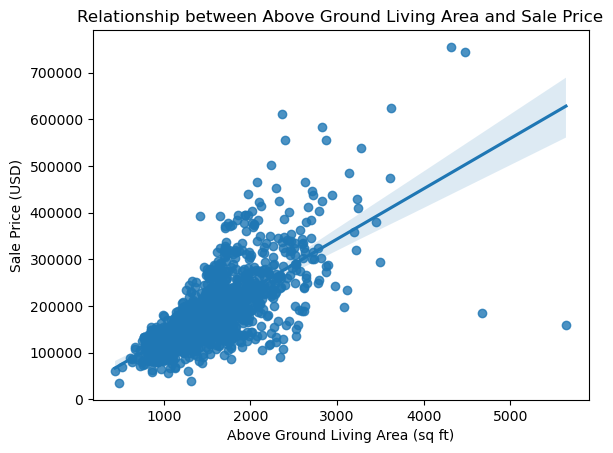

In [23]:
# Create a scatterplot of GrLivArea vs. SalePrice with regression line
sns.regplot(x='GrLivArea', y='SalePrice', data=house)
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.title('Relationship between Above Ground Living Area and Sale Price')
plt.show()

# `GarageArea` dengan `SalePrice`

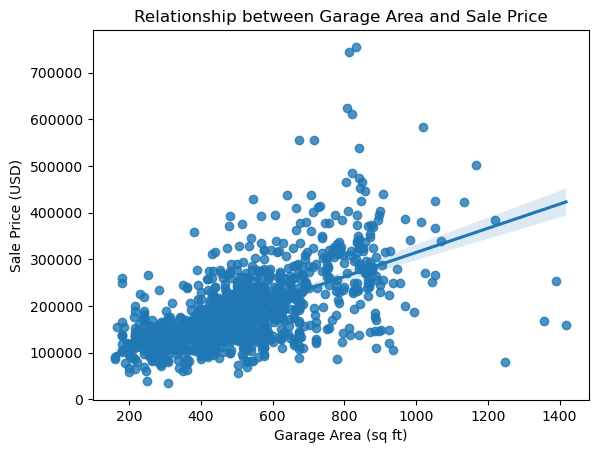

In [22]:
# Drop rows with GarageArea = 0
house = house[house['GarageArea'] != 0]

# Create a scatterplot of GarageArea vs. SalePrice with regression line
sns.regplot(x='GarageArea', y='SalePrice', data=house)
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.title('Relationship between Garage Area and Sale Price')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

## Hubungan GrLiveArea dan SalePrice
* Dari plot, kita dapat melihat bahwa terdapat hubungan positif yang kuat antara Above Ground Living Area (GrLivArea) dan SalePrice, dengan tren yang jelas mengarah ke atas. Dengan kata lain, semakin besar Above Ground Living Area suatu rumah, semakin tinggi harga jualnya. Garis regresi juga menunjukkan hubungan yang kuat antara GrLivArea dan SalePrice.

* Namun, kita juga dapat melihat beberapa titik outlier yang terpisah jauh dari garis regresi, menunjukkan kemungkinan adanya faktor lain yang mempengaruhi harga jual selain luas area hunian. Sebagai contoh, lokasi properti dan kondisi bangunan dapat menjadi faktor penting dalam menentukan harga jual.

* Secara keseluruhan, kita dapat menyimpulkan bahwa Above Ground Living Area dapat menjadi faktor penting dalam menentukan harga jual rumah, namun harus dipertimbangkan bersama dengan faktor-faktor lain yang dapat mempengaruhi harga jual properti.

## Hubungan GarageArea dan SalePrice
* Dari plot, kita dapat melihat bahwa terdapat hubungan positif antara GarageArea dan SalePrice, dengan tren yang jelas mengarah ke atas. Dengan kata lain, semakin besar ukuran area garasi, semakin tinggi SalePrice-nya. Garis regresi juga menunjukkan hubungan yang kuat antara GarageArea dan SalePrice.

* Namun, kita juga dapat melihat beberapa titik outlier yang terpisah jauh dari garis regresi, menunjukkan kemungkinan adanya faktor lain yang mempengaruhi harga jual selain ukuran area garasi. Sebagai contoh, lokasi properti dan kondisi bangunan dapat menjadi faktor penting dalam menentukan harga jual.

* Secara keseluruhan, kita dapat menyimpulkan bahwa ukuran area garasi dapat menjadi faktor penting dalam menentukan harga jual rumah, namun harus dipertimbangkan bersama dengan faktor-faktor lain yang dapat mempengaruhi harga jual properti.